## GRIP@The Sparks Foundation

### Author: Sanjana Sharma (Data Science and Business Analytics Intern) 

## Task2: Prediction using Unsupervised Machine Learning
### Predict the optimum number of clusters and represent it visually.

## Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Loading iris dataset

In [5]:
dataset=pd.read_csv('Iris.csv')
dataset.drop(['Id'], axis=1, inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.shape

(150, 5)

In [10]:
#Check if any null value exists in dataset
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Dropping duplicates if any
dataset.drop_duplicates(inplace=True)

In [12]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data visualization

In [13]:
import seaborn as sn

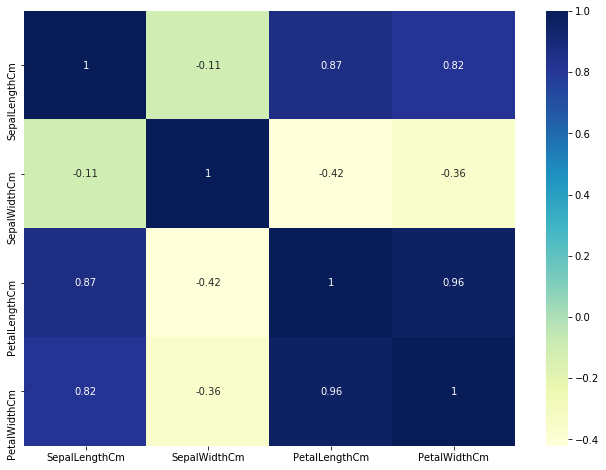

In [25]:
plt.figure(figsize=(11,8))
sn.heatmap(dataset.corr(), cmap='YlGnBu', annot=True)
plt.show()

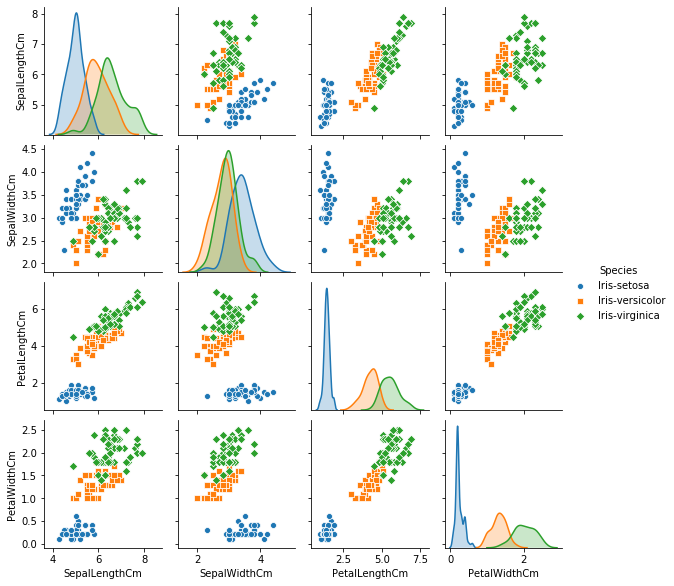

In [29]:
sn.pairplot(dataset, hue = 'Species', height = 2, markers = ["o", "s", "D"])
plt.show();

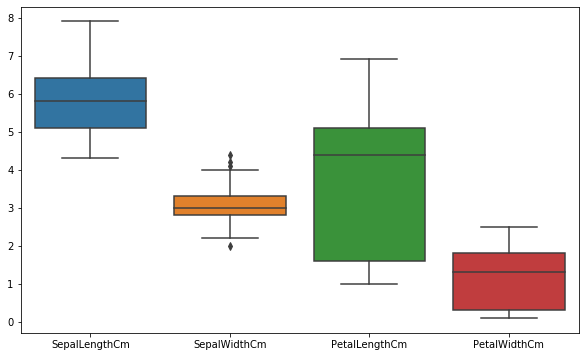

In [32]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sn.boxplot(data=dataset)
plt.show()

### From the above graphs we can conclude that petal length and petal width are better predictors since setosa is clearly separable

## K-means clustering

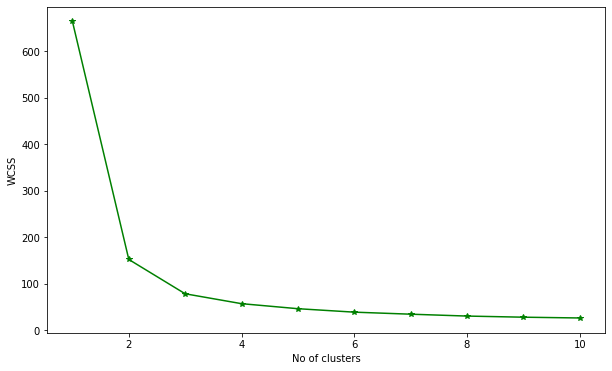

In [38]:
#Preparing data
X=dataset.iloc[:,0:4].values

from sklearn.cluster import KMeans
wcss=[]
k_inr=range(1,11)
for k in k_inr:
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(X)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,6))
plt.xlabel("No of clusters")
plt.ylabel('WCSS')
plt.plot(k_inr,wcss,marker='*', color='green')

In 'The elbow method' the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.


### From this we choose the number of clusters as 3.

## Making Predictions

In [40]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [41]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

## Plotting clusters

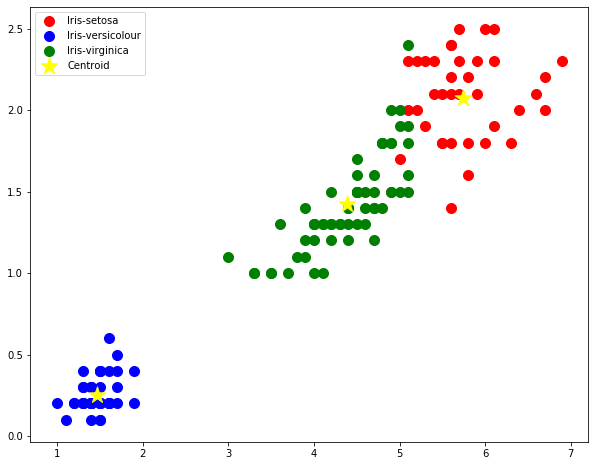

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'yellow',marker='*', 
            label = 'Centroid')
plt.legend()

## Conclusion

### The optimum number of clusters is 3.

## Thank you